GoogLeNet是2014年提出的，获得当年ILSVRC比赛的第一名。
与VGG相比起其特点是“更宽”，更广泛地结合了多种卷积网络的优点。
GoogLeNet由Inception模块组成，Inception模块在同一层中并行使用不同大小的卷积核和池化层,
然后对输出cat,这可以加深网络而不增加参数量。

在Inception v1中，分别使用conv1x1,conv3x3,conv7x7和MaxPool3x3
在v2中，为后面三种卷积都添加了conv1x1来降维
在v3中，使用多个conv3x3来代替conv7x7
往后，Inception被不断改进，例如使用残差连接，使用可分离卷积，等等。

GoogLeNet的结构如下：
conv7x7 MaxPool con3x3 MaxPool Incept*2 MaxPool 

In [31]:
#CIFAR数据集测试
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])
train_loader = DataLoader(CIFAR10('../data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(CIFAR10('../data', train=False, download=True, transform=transform), batch_size=64, shuffle=False)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(len(train_loader))
print(len(test_loader))

Files already downloaded and verified
Files already downloaded and verified
782
157


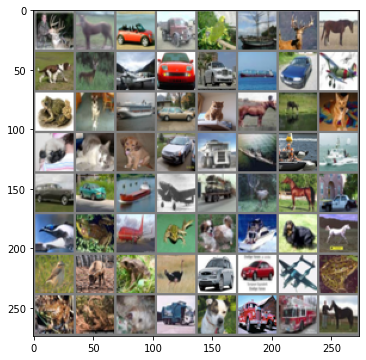

['deer', 'horse', 'automobile', 'truck', 'bird', 'ship', 'deer', 'horse']
['dog', 'deer', 'airplane', 'automobile', 'automobile', 'ship', 'automobile', 'airplane']
['frog', 'dog', 'ship', 'automobile', 'cat', 'horse', 'deer', 'dog']
['dog', 'cat', 'dog', 'automobile', 'truck', 'ship', 'ship', 'ship']
['automobile', 'automobile', 'ship', 'airplane', 'truck', 'deer', 'horse', 'automobile']
['bird', 'frog', 'airplane', 'frog', 'dog', 'ship', 'dog', 'horse']
['bird', 'deer', 'frog', 'bird', 'automobile', 'automobile', 'airplane', 'frog']
['frog', 'frog', 'dog', 'truck', 'dog', 'truck', 'truck', 'horse']


In [36]:
#查看图片
import matplotlib.pyplot as plt 
from torchvision.utils import make_grid
import numpy as np

img_batch, label_batch = next(iter(train_loader))
img = make_grid(img_batch)
img = img / 2 + 0.5  
npimg = img.numpy()
plt.figure(figsize=(6,6))
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()
labels = [class_names[l] for l in label_batch]
labels_2d = [labels[i:i+8] for i in range(0, len(labels), 8)]
[print(row) for row in labels_2d]
pass

In [37]:
#打印输入和输出有关信息
print(img_batch.shape)
print(label_batch.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


训练结果（跑20个epoch，每个epoch用128个batch）：

在测试集上有 58.89%的成功率

![训练结果](img/res1.png)